In [1]:
#imports
import pickle
import pandas as pd
import numpy as np


In [2]:
#load apple_df_ML.pkl
apple_df_ML = pickle.load(open('data/aapl_df_ML.pkl', 'rb'))


In [3]:
apple_df_ML

,0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,gain
0,174.993165,175.262161,175.326203,175.333506,175.174624,175.143635,175.092023,175.182309,175.135530,175.131839,...,173.663324,173.762816,173.741634,173.709817,173.689551,173.614162,173.694826,173.704257,173.852847,0
1,174.268971,174.331698,174.327203,174.383632,174.390428,174.396324,174.379836,174.381052,174.365631,174.397604,...,174.998483,174.992188,175.062741,174.937167,175.019697,174.976368,174.981774,175.122961,175.315356,0
2,174.702010,173.674464,173.697143,173.712588,173.987127,173.728017,173.743890,173.576979,173.556946,173.527520,...,175.482352,175.479933,175.335895,175.707779,175.626402,175.629423,175.684590,175.533145,175.564717,0
3,174.275992,174.243930,174.196601,174.204833,174.176383,174.178340,174.175855,174.178927,174.137326,174.168442,...,171.267621,171.351106,171.494431,171.811951,171.907775,172.260384,172.137596,172.297082,172.439572,0
4,172.526935,172.530714,172.539828,172.540481,172.550000,172.550000,172.540277,172.540741,172.548624,172.540000,...,172.495045,172.495045,172.495045,172.495045,172.495045,172.495045,172.495045,172.495045,172.495045,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,161.600000,161.109259,161.163239,161.160000,162.102737,162.149173,162.140215,162.168397,162.174679,162.189322,...,163.208558,163.035943,163.069461,162.991732,162.926154,162.992023,162.975575,162.942875,162.899319,0
131,160.513118,160.500000,160.496934,160.500227,161.077795,160.520000,160.510000,160.590000,160.590000,160.590000,...,161.284349,161.335006,161.447639,161.605123,161.681777,161.605855,161.447764,161.322660,161.249213,0
132,159.990000,159.999935,160.000000,159.990000,160.000000,160.165330,160.047435,160.145904,160.157413,160.140935,...,164.488959,164.489116,164.560081,164.570746,164.573337,164.762487,164.777086,164.778929,164.703604,1
133,165.350000,165.347613,165.350472,165.370000,165.360000,165.430000,165.714223,165.838910,165.827016,165.840374,...,164.688268,164.632645,164.683624,164.503498,164.558596,164.636415,164.782106,164.868374,164.843527,1


In [4]:
X = apple_df_ML.drop('gain', axis=1).values
y = apple_df_ML['gain'].values
X

array([[174.993165, 175.262161, 175.326203, ..., 173.694826, 173.704257,
        173.852847],
       [174.268971, 174.331698, 174.327203, ..., 174.981774, 175.122961,
        175.315356],
       [174.70201 , 173.674464, 173.697143, ..., 175.68459 , 175.533145,
        175.564717],
       ...,
       [159.99    , 159.999935, 160.      , ..., 164.777086, 164.778929,
        164.703604],
       [165.35    , 165.347613, 165.350472, ..., 164.782106, 164.868374,
        164.843527],
       [165.755   , 165.64    , 165.65    , ..., 164.32636 , 164.31689 ,
        164.300722]])

In [53]:
# import the necessary modules
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1204)

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
!TF_ENABLE_ONEDNN_OPTS=1
!CUDA_VISIBLE_DEVICES=1
!TF_ENABLE_ONEDNN_OPTS=1

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras import layers
from tensorflow.keras import activations

In [62]:
model = Sequential()

model.add(Dense(units=360, activation=activations.gelu))
model.add(Dropout(0.02))

model.add(Dense(units=400, activation=activations.gelu))
model.add(Dropout(0.02))

model.add(Dense(units=150, activation=activations.gelu))
model.add(Dropout(0.02))

model.add(Dense(units=85, activation=activations.gelu))
model.add(Dropout(0.02))

model.add(Dense(units=100, activation=activations.gelu))
model.add(Dropout(0.02))

model.add(Dense(units=1, activation=activations.sigmoid))

#binary_crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam')


In [65]:
#train the model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=False)
model.fit(x=X_train, y=y_train, epochs=1000, batch_size=256, validation_data=(X_test, y_test), verbose=1, callbacks=[callback])

Epoch 1/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.5248 - val_loss: 0.7070
Epoch 2/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.5813 - val_loss: 0.6661
Epoch 3/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.5312 - val_loss: 0.7247
Epoch 4/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.5648 - val_loss: 0.6854
Epoch 5/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.5344 - val_loss: 0.6823
Epoch 6/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.5368 - val_loss: 0.6771
Epoch 7/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.5385 - val_loss: 0.6891
Epoch 8/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.5427 - val_loss: 0.7004
Epoch 9/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.5257 - val_loss: 0.6728
Epoch 10/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.5147 - val_loss: 0.6755
Epoch 11/

<AxesSubplot:>

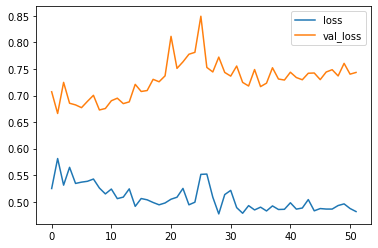

In [66]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [108]:
from sklearn.metrics import confusion_matrix, classification_report

In [109]:
# if model.predict(X_test) > 0.44 then 1 else 0:
predictions = model.predict(X_test)
offset = .00
predictions[predictions > (predictions.mean() + offset)] = 1
predictions[predictions <= (predictions.mean() + offset)] = 0
predictions

3/3 [==============================] - 0s 2ms/step


array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],

In [110]:
print(classification_report(y_test, predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.63      0.69      0.66        42
           1       0.74      0.69      0.71        54

    accuracy                           0.69        96
   macro avg       0.69      0.69      0.69        96
weighted avg       0.69      0.69      0.69        96



In [111]:
confusion_matrix(y_test, predictions)

array([[29, 13],
       [17, 37]])

In [112]:
#save the mode
model.save('models/apple_model_ML.h5')